In [1]:
import plotly.express as px

from common.explore import display_sql

In [2]:
display_sql(f'''
SELECT online_at,
       added,
       deleted,
       COUNT(DISTINCT job_id) AS total_jobs
  FROM normalized_online_job
 GROUP BY 1, 2, 3
 ORDER BY 1, 2, 3
''', read_only=False)

,online_at,added,deleted,total_jobs
0,2021-10-10,False,False,110427
1,2021-10-10,False,True,2944
2,2021-10-10,True,False,474
3,2021-10-11,False,False,107957
4,2021-10-11,False,True,1419
...,...,...,...,...
1114,2022-10-19,False,True,1553
1115,2022-10-19,True,False,3833
1116,2022-10-20,False,False,147746
1117,2022-10-20,False,True,3597


In [3]:
df = display_sql(f'''
SELECT online_at,
       COUNT(DISTINCT job_id) AS total_jobs
  FROM normalized_online_job
 WHERE location_name = 'Walldorf'
 GROUP BY 1
 ORDER BY 1
''')
df

,online_at,total_jobs
0,2021-10-10,118
1,2021-10-11,115
2,2021-10-12,120
3,2021-10-13,120
4,2021-10-14,122
...,...,...
371,2022-10-16,281
372,2022-10-17,281
373,2022-10-18,282
374,2022-10-19,279


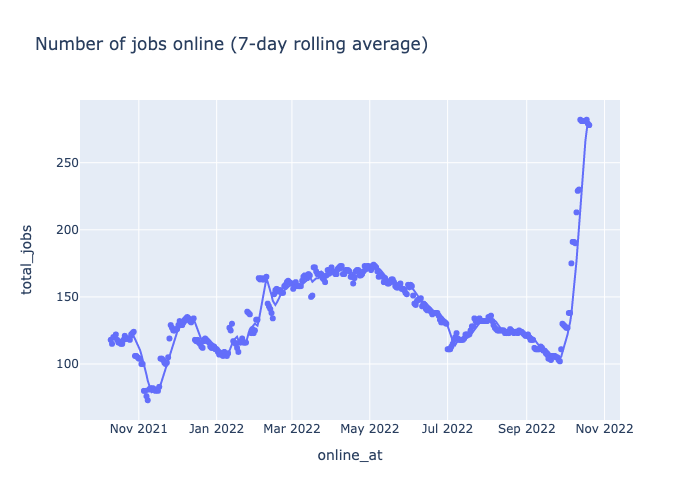

In [4]:
fig = px.scatter(df, x='online_at', y='total_jobs', trendline='rolling', trendline_options=dict(window=7),
                 title='Number of jobs online (7-day rolling average)')
fig.show('png')

In [ ]:
display_sql(f'''
SELECT company_name,
       COUNT(DISTINCT job_id) AS total_jobs
  FROM normalized_online_job
 WHERE company_name ilike '%sap%'
 GROUP BY 1
 ORDER BY 2 DESC
''')

In [ ]:
df = display_sql(f'''
SELECT online_at,
       COUNT(DISTINCT job_id) AS total_jobs
  FROM normalized_online_job
 WHERE company_name = 'SAP SE'
    OR company_name = 'SAP AG'
 GROUP BY 1
 ORDER BY 1
''')

In [ ]:
fig = px.scatter(df, x='online_at', y='total_jobs', trendline='rolling', trendline_options=dict(window=7),
                 title='Number of jobs online (7-day rolling average)')
fig.show('png')

In [ ]:
display_sql(f'''
SELECT technology_name,
       COUNT(DISTINCT job_id) AS total_jobs
  FROM normalized_online_job
 GROUP BY 1
 ORDER BY 2 DESC
''')